<a href="https://colab.research.google.com/github/jayanimalik/DL-tensorflow/blob/main/data_augmentation_to_address_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [5]:
data_dir

'./datasets/flower_photos'

In [6]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir
#non windows operating system path

PosixPath('datasets/flower_photos')

In [7]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [8]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/6690926183_afedba9f15_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1793211631_68c31a74dc.jpg'),
 PosixPath('datasets/flower_photos/roses/6655078437_759fd626fd_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5292988046_a10f4b0365_n.jpg'),
 PosixPath('datasets/flower_photos/roses/898102603_2d5152f09a.jpg')]

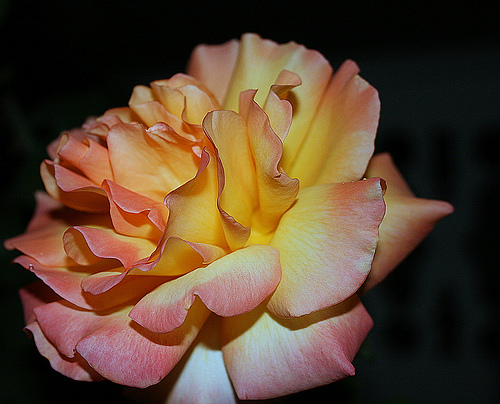

In [9]:
PIL.Image.open(str(roses[1]))

In [10]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [11]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [12]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/6690926183_afedba9f15_n.jpg'

In [13]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape #(x,y,RGB channel)

(256, 320, 3)

In [14]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [15]:
X,y=[], []
for flower_name, images in flowers_images_dict.items():
  print(flower_name)
  print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [16]:
X,y=[], []
for flower_name, images in flowers_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [17]:
X=np.array(X)
y=np.array(y)

In [18]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0)

In [19]:
#scaling
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [20]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'), #16 filters, 3*3 size
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 97s 1s/step - loss: 1.4559 - accuracy: 0.3950
Epoch 2/10
86/86 [==============================] - 106s 1s/step - loss: 1.0609 - accuracy: 0.5832
Epoch 3/10
86/86 [==============================] - 91s 1s/step - loss: 0.8451 - accuracy: 0.6835
Epoch 4/10
86/86 [==============================] - 96s 1s/step - loss: 0.6374 - accuracy: 0.7660
Epoch 5/10
86/86 [==============================] - 101s 1s/step - loss: 0.4182 - accuracy: 0.8434
Epoch 6/10
86/86 [==============================] - 94s 1s/step - loss: 0.2406 - accuracy: 0.9230
Epoch 7/10
86/86 [==============================] - 105s 1s/step - loss: 0.1350 - accuracy: 0.9651
Epoch 8/10
86/86 [==============================] - 104s 1s/step - loss: 0.1111 - accuracy: 0.9691
Epoch 9/10
86/86 [==============================] - 97s 1s/step - loss: 0.0587 - accuracy: 0.9858
Epoch 10/10
86/86 [==============================] - 95s 1s/step - loss: 0.0295 - accuracy: 0.9938


In [21]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 21s 697ms/step - loss: 1.9255 - accuracy: 0.6547


[1.9254997968673706, 0.6546840667724609]

In [22]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 10s 352ms/step


array([[ 5.1262026 ,  4.452388  , -1.2438129 , -8.247302  , -0.216015  ],
       [ 2.9521773 , -2.4855318 , -0.45995396, -6.788065  , -2.1333117 ],
       [-3.1785617 , -3.9234068 , 10.06241   , -0.14173219, -1.967005  ],
       ...,
       [-1.5904297 , -7.712207  ,  0.9196359 ,  8.806618  , -2.7384005 ],
       [ 3.7192757 , -0.76319456, -3.4810395 , -6.0859756 ,  0.46012887],
       [-3.1432168 , -6.3453298 ,  4.3361673 ,  3.5867846 , -1.630928  ]],
      dtype=float32)

In [26]:
score = tf.nn.softmax(predictions[1])

In [27]:
np.argmax(score)

0

In [28]:
y_test[1]

0

**Data Augmentation to address overfitting**

In [22]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomContrast(0.9)
])

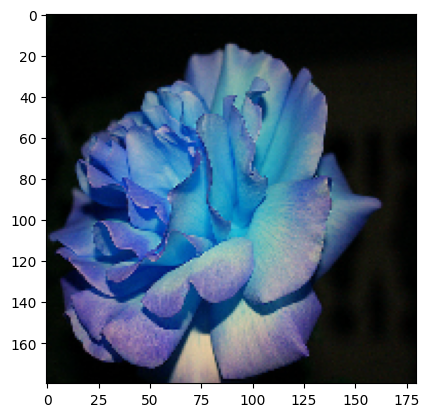

In [32]:
#plt.axis('off')
plt.imshow(X[1])

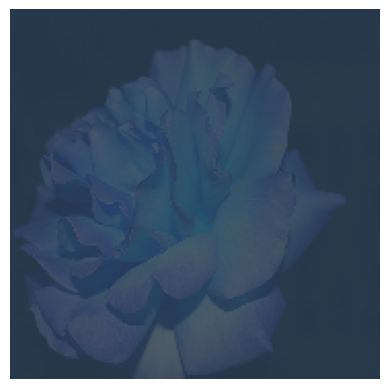

In [23]:
plt.axis('off')
plt.imshow(data_augmentation(X)[1].numpy().astype("uint8"))

In [25]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [26]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 114s 1s/step - loss: 1.4569 - accuracy: 0.3732
Epoch 2/10
86/86 [==============================] - 106s 1s/step - loss: 1.1094 - accuracy: 0.5585
Epoch 3/10
86/86 [==============================] - 106s 1s/step - loss: 0.9884 - accuracy: 0.6177
Epoch 4/10
86/86 [==============================] - 104s 1s/step - loss: 0.9084 - accuracy: 0.6519
Epoch 5/10
86/86 [==============================] - 104s 1s/step - loss: 0.8273 - accuracy: 0.6686
Epoch 6/10
86/86 [==============================] - 107s 1s/step - loss: 0.7709 - accuracy: 0.6857
Epoch 7/10
86/86 [==============================] - 110s 1s/step - loss: 0.7404 - accuracy: 0.7115
Epoch 8/10
86/86 [==============================] - 105s 1s/step - loss: 0.7049 - accuracy: 0.7260
Epoch 9/10
86/86 [==============================] - 109s 1s/step - loss: 0.6668 - accuracy: 0.7420
Epoch 10/10
86/86 [==============================] - 105s 1s/step - loss: 0.6255 - accuracy: 0.7671


In [27]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 12s 405ms/step - loss: 0.7666 - accuracy: 0.7070


[0.7665557265281677, 0.7069717049598694]